# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [3]:
%config Completer.use_jedi = False

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [5]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
y.value_counts()

1    71
0    59
2    48
dtype: int64

## 1. Train a [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering model on the data set using 8 clusters and compute the [silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for the model.

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [11]:
# standardizing data

scaler = StandardScaler()
X_stand = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_stand.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [12]:
# fiting the model

km = KMeans(n_clusters=8)
km.fit(X_stand)

KMeans()

In [13]:
# make predictions

y_pred = km.predict(X_stand)
y_pred

array([2, 6, 2, 2, 4, 2, 2, 6, 2, 2, 2, 6, 6, 2, 2, 6, 6, 6, 2, 6, 2, 6,
       6, 6, 6, 4, 6, 6, 6, 2, 6, 2, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6, 2, 0,
       2, 6, 2, 2, 2, 2, 2, 6, 2, 6, 2, 2, 2, 6, 2, 7, 7, 7, 7, 0, 7, 0,
       0, 7, 7, 5, 7, 0, 7, 4, 0, 7, 7, 7, 5, 0, 7, 0, 7, 3, 0, 7, 7, 7,
       7, 7, 7, 7, 7, 0, 0, 5, 4, 0, 0, 0, 7, 7, 0, 7, 7, 7, 7, 7, 0, 0,
       0, 0, 4, 7, 7, 7, 7, 7, 3, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [14]:
cross = pd.crosstab(y_pred, y)
cross

col_0,0,1,2
row_0,,,
0,1,25,0
1,0,0,23
2,28,0,0
3,0,3,25
4,2,6,0
5,0,3,0
6,28,0,0
7,0,34,0


In [15]:
from sklearn.metrics import silhouette_score

In [16]:
silhouette_score(X_stand, y_pred)

0.1331076901874929

It looks like clusters overlap

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [17]:
# fiting the model

km2 = KMeans(n_clusters=5)
km2.fit(X_stand)

# make predictions

y_pred2 = km2.predict(X_stand)
y_pred2

array([1, 4, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 4,
       4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 4, 3, 4,
       4, 3, 3, 4, 3, 0, 3, 0, 4, 3, 4, 3, 4, 0, 3, 4, 3, 2, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 0, 4, 4, 4, 4, 3, 0, 3, 3, 3, 3, 3, 3, 0,
       4, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [18]:
cross = pd.crosstab(y_pred2, y)
cross

col_0,0,1,2
row_0,,,
0,3,13,0
1,49,0,0
2,0,1,48
3,0,40,0
4,7,17,0


In [19]:
silhouette_score(X_stand, y_pred2)

0.22558793395507704

The score is better than the previous iteration but still close to zero, implying clusters overlap

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [20]:
# fiting the model

km3 = KMeans(n_clusters=3)
km3.fit(X_stand)

# make predictions

y_pred3 = km3.predict(X_stand)
y_pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [21]:
cross = pd.crosstab(y_pred3, y)
cross

col_0,0,1,2
row_0,,,
0,59,3,0
1,0,3,48
2,0,65,0


In [22]:
silhouette_score(X_stand, y_pred3)

0.2848589191898987

Once again, silhouette score improves but not close to 1

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

In [24]:
# create list with fitted models in the range n_clusters 1-20

kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(X_stand)

In [26]:
# calculating inertias for each model so we can then plot

inertias = [model.inertia_ for model in kmeans]
print(inertias)

[2313.999999999999, 1658.758852429096, 1277.928488844643, 1175.4283331033473, 1110.737661929376, 1049.260383939164, 989.1653860181872, 936.223915602033, 900.5326201633231, 853.4039277184588, 825.4778493981397, 792.757196780831, 775.8158520287653, 745.1189201316158, 717.9967930382966, 706.1769557291784, 682.3791039588259, 662.6118889146668, 648.8838026228042, 634.6549038800928]


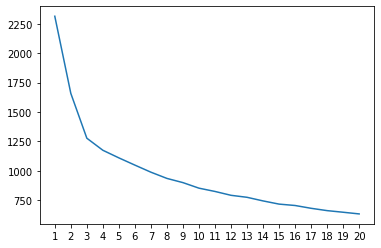

In [28]:
# plot intertias in graph to carry out elbow test

plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

It looks like the ideal candidate would be 3, potentially considering 4 as well

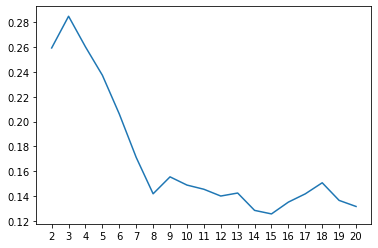

In [29]:
# plotting silhouette scores

sil = [silhouette_score(X_stand,model.labels_) for model in kmeans[1:]]
plt.plot(range(2,21),sil)
plt.xticks(range(2,21));

Again, 3 looks like the ideal choice. We will add the clusters to a copy of the dataframe

In [35]:
kmeans_clusters = pd.DataFrame(X_stand, columns = X_stand.columns)

In [38]:
kmeans_clusters["cluster"] = y_pred3

In [39]:
kmeans_clusters.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


## 5. Try performing the same elbow tests with an [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) model and compare the results you get to the KMeans results.

In [52]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

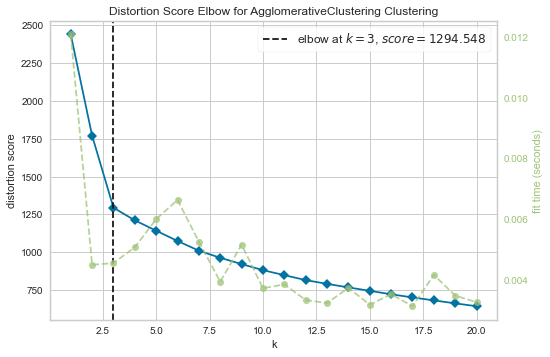

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
# Instantiate the clustering model and visualizer
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(1,21))

# Fit the data to the visualizer
visualizer.fit(X_stand)

# Finalize and render the figure
visualizer.show()

The elbow is at the same point, n_clusters = 3

## 6. Create and plot a scatter matrix (pairplot) showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

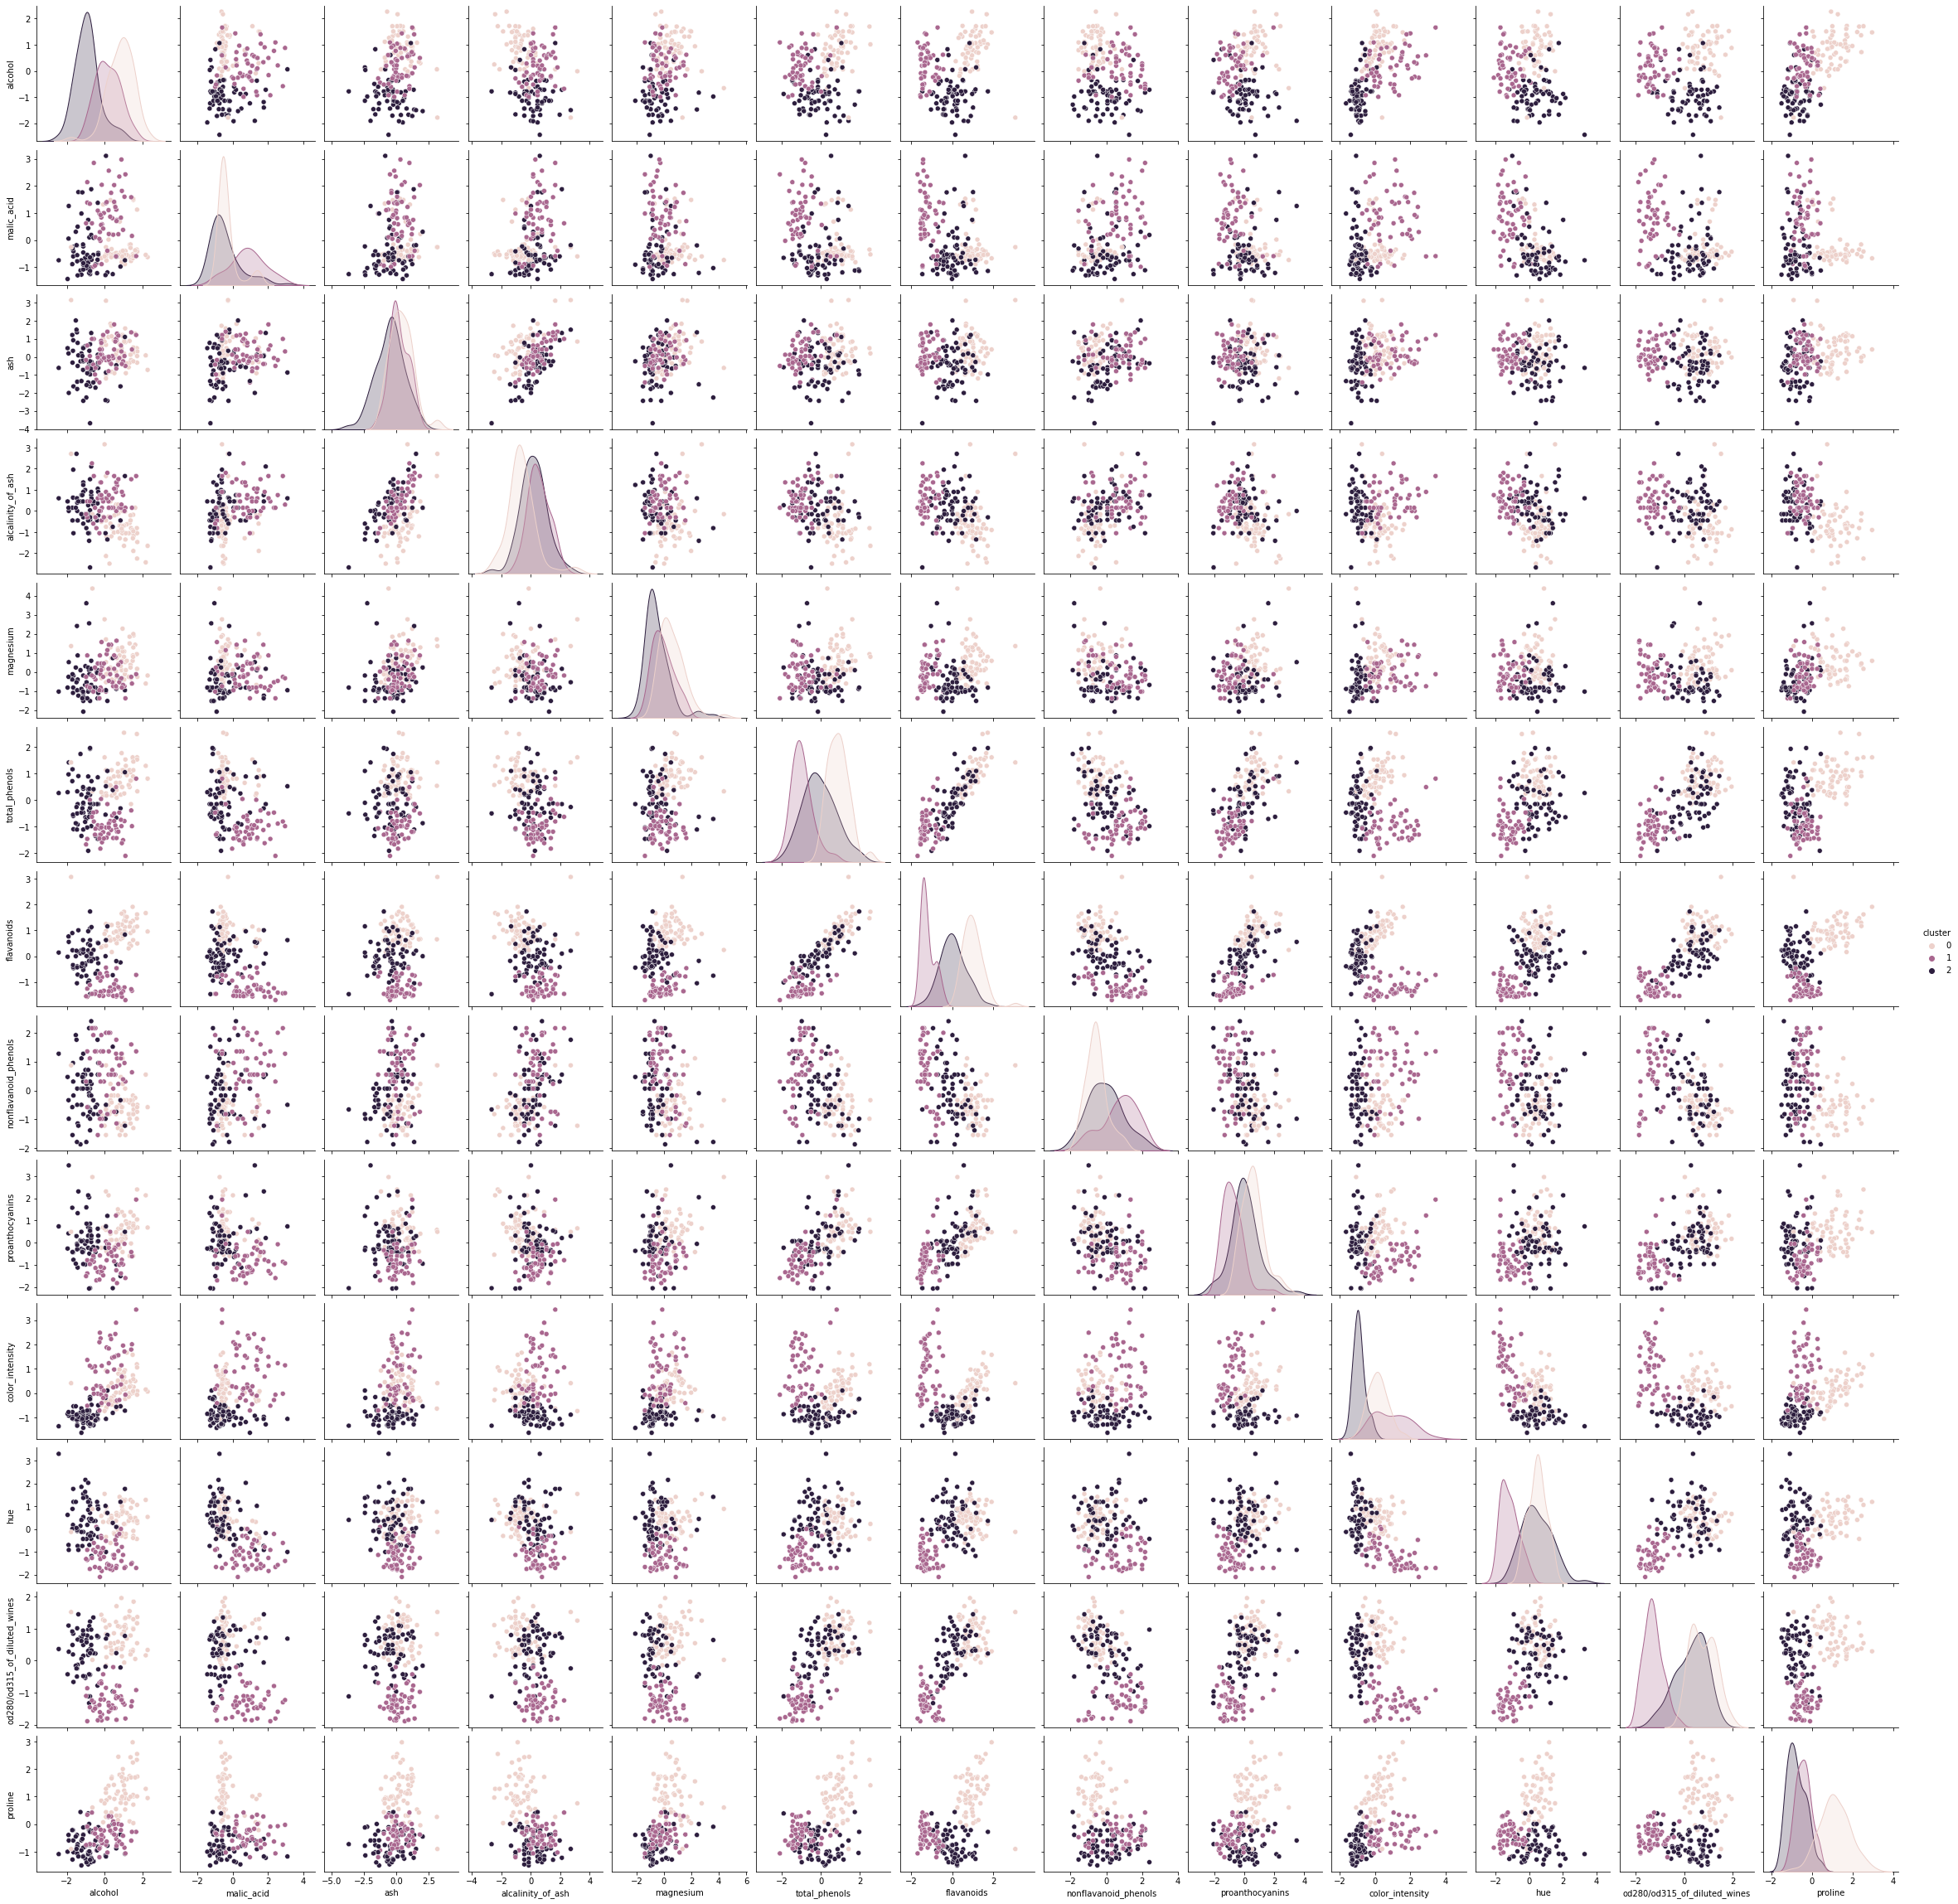

In [50]:
sns.pairplot(kmeans_clusters, hue="cluster")

## 7. Apply a [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) transform and plot the first two principle components with the plot point colors determined by cluster.

In [54]:
from sklearn.decomposition import PCA

In [60]:
# start PCA with two components
pca = PCA(2)

# fit pca without including the cluster column
data_transformed = pd.DataFrame(pca.fit_transform(X_stand.drop("cluster", axis = 1)), columns=["PC1","PC2"])

# include cluster column again
data_transformed["cluster"] = X_stand["cluster"]

data_transformed.head()

,PC1,PC2,cluster
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


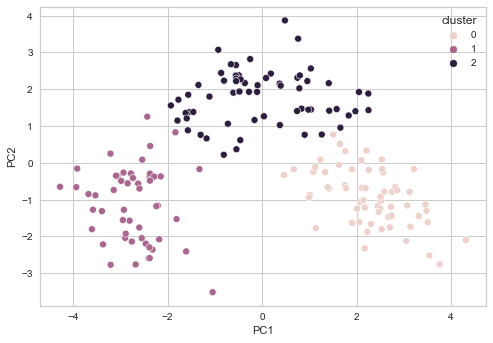

In [68]:
sns.scatterplot(x = data_transformed["PC1"],y = data_transformed["PC2"], hue=data_transformed["cluster"]);

## 8. Generate a series of [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) plots showing the clusters at a variety of perplexities.

In [69]:
from sklearn.manifold import TSNE

In [76]:
perplex = [5, 15, 30, 50]
for num, val in enumerate(perplex):
    print(num, val)

0 5
1 15
2 30
3 50


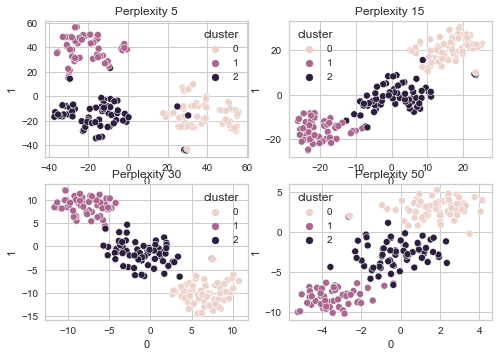

In [85]:
perplex = [5, 15, 30, 50]
for num, i in enumerate(perplex):
    # start tsne
    tsne = TSNE(n_components=2, perplexity=i, n_iter=1000, learning_rate=200)

    #fit tsne without column cluster
    data_tsne = pd.DataFrame(tsne.fit_transform(X_stand.drop(columns=["cluster"])))

    # include cluster column again
    data_tsne["cluster"] = X_stand["cluster"]

    # plot

    plt.subplot(2,2,num+1)
    plt.title(f"Perplexity {i}")
    sns.scatterplot(x = data_tsne[0],y = data_tsne[1], hue=data_tsne["cluster"]);